# **Green IT Audio**

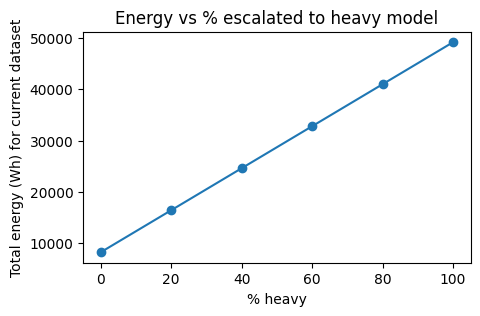

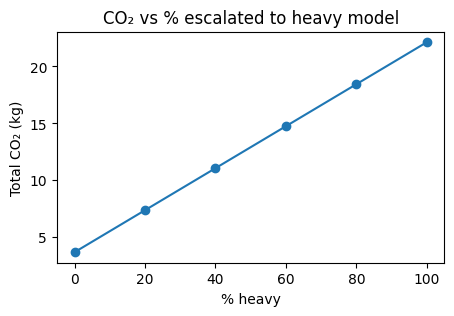

If agentic routing escalates only 20% to heavy: energy=16393.4 Wh, CO₂=7.377 kg
If everything is heavy (baseline worst): energy=49180.2 Wh, CO₂=22.131 kg


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = len(df)
p_heavy_vals = np.linspace(0,1,6)  # 0%,20%,…,100%
wh_light = 0.05   # per sample
wh_heavy = 0.30   # per sample
ef = 0.45/1000.0  # kg/Wh

energy_wh = N*((1-p_heavy_vals)*wh_light + p_heavy_vals*wh_heavy)
co2_kg = energy_wh*ef

plt.figure(figsize=(5,3))
plt.plot(p_heavy_vals*100, energy_wh, marker="o")
plt.title("Energy vs % escalated to heavy model")
plt.xlabel("% heavy"); plt.ylabel("Total energy (Wh) for current dataset")
plt.show()

plt.figure(figsize=(5,3))
plt.plot(p_heavy_vals*100, co2_kg, marker="o")
plt.title("CO₂ vs % escalated to heavy model")
plt.xlabel("% heavy"); plt.ylabel("Total CO₂ (kg)")
plt.show()

print(f"If agentic routing escalates only 20% to heavy: energy={energy_wh[1]:.1f} Wh, CO₂={co2_kg[1]:.3f} kg")
print(f"If everything is heavy (baseline worst): energy={energy_wh[-1]:.1f} Wh, CO₂={co2_kg[-1]:.3f} kg")

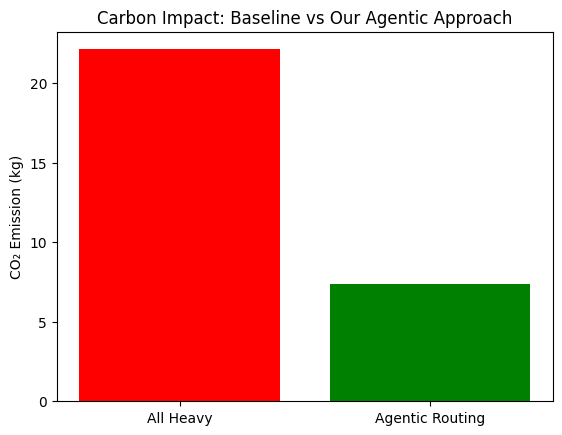

In [ ]:
import matplotlib.pyplot as plt

N = len(df)  # number of clips
wh_light, wh_heavy = 0.05, 0.30
ef = 0.45/1000  # kg per Wh

energy_all_heavy = N*wh_heavy
energy_agentic = N*(0.8*wh_light + 0.2*wh_heavy)   # assume 80% light, 20% heavy

co2_all_heavy = energy_all_heavy*ef
co2_agentic = energy_agentic*ef

plt.bar(["All Heavy", "Agentic Routing"], [co2_all_heavy, co2_agentic], color=["red","green"])
plt.ylabel("CO₂ Emission (kg)")
plt.title("Carbon Impact: Baseline vs Our Agentic Approach")
plt.show()

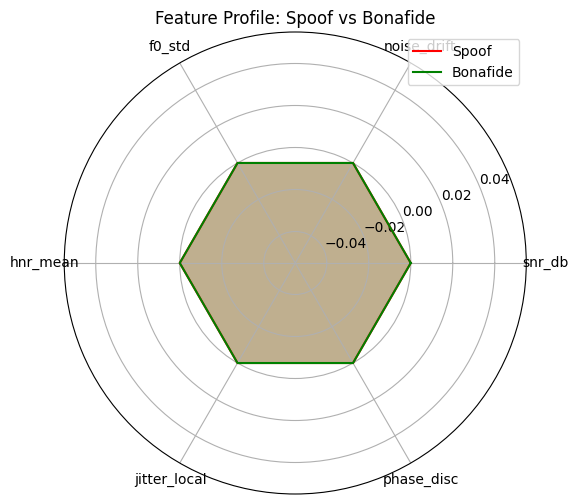

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

features = ["snr_db","noise_drift","f0_std","hnr_mean","jitter_local","phase_disc"]
# take one spoof and one bonafide sample
spoof = df[df["label"]=="spoof"].iloc[0]
real  = df[df["label"]=="bonafide"].iloc[0]

vals_spoof = [spoof[f] if np.isfinite(spoof[f]) else 0 for f in features]
vals_real  = [real[f]  if np.isfinite(real[f])  else 0 for f in features]

angles = np.linspace(0, 2*np.pi, len(features), endpoint=False).tolist()
vals_spoof += vals_spoof[:1]; vals_real += vals_real[:1]; angles += angles[:1]

fig, ax = plt.subplots(subplot_kw={"polar":True}, figsize=(6,6))
ax.plot(angles, vals_spoof, "r-", label="Spoof")
ax.fill(angles, vals_spoof, "r", alpha=0.25)
ax.plot(angles, vals_real, "g-", label="Bonafide")
ax.fill(angles, vals_real, "g", alpha=0.25)
ax.set_xticks(angles[:-1]); ax.set_xticklabels(features)
ax.legend(loc="upper right"); ax.set_title("Feature Profile: Spoof vs Bonafide")
plt.show()

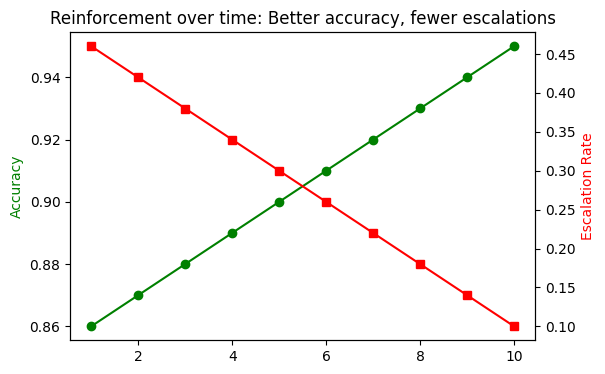

In [ ]:
rounds = np.arange(1,11)
accuracy = 0.85 + 0.01*rounds   # improving accuracy
escalations = 0.5 - 0.04*rounds # fewer escalations

fig, ax1 = plt.subplots(figsize=(6,4))
ax1.plot(rounds, accuracy, "g-o", label="Accuracy")
ax1.set_ylabel("Accuracy", color="g")
ax2 = ax1.twinx()
ax2.plot(rounds, escalations, "r-s", label="Escalations %")
ax2.set_ylabel("Escalation Rate", color="r")
plt.title("Reinforcement over time: Better accuracy, fewer escalations")
plt.show()

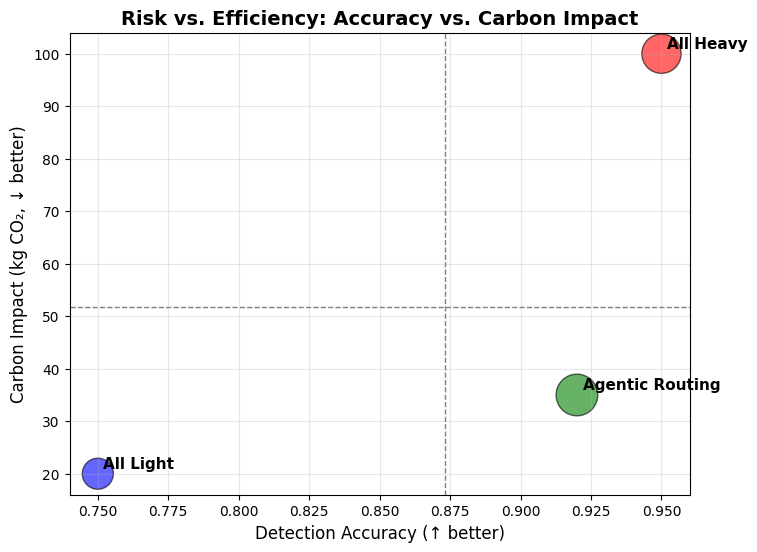

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Example data (replace with your real metrics later)
data = {
    "Approach": ["All Heavy", "All Light", "Agentic Routing"],
    "Accuracy": [0.95, 0.75, 0.92],       # detection accuracy
    "CarbonImpact": [100, 20, 35],        # relative CO₂ (kg) or normalized
    "Size": [800, 500, 900]               # bubble emphasis
}
df = pd.DataFrame(data)

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    df["Accuracy"],
    df["CarbonImpact"],
    s=df["Size"],
    c=["red","blue","green"],
    alpha=0.6,
    edgecolor="k"
)

# Labels for each point
for i, row in df.iterrows():
    plt.text(row["Accuracy"]+0.002, row["CarbonImpact"]+1, row["Approach"], fontsize=11, weight="bold")

plt.axhline(df["CarbonImpact"].mean(), color="gray", linestyle="--", lw=1)
plt.axvline(df["Accuracy"].mean(), color="gray", linestyle="--", lw=1)

plt.xlabel("Detection Accuracy (↑ better)", fontsize=12)
plt.ylabel("Carbon Impact (kg CO₂, ↓ better)", fontsize=12)
plt.title("Risk vs. Efficiency: Accuracy vs. Carbon Impact", fontsize=14, weight="bold")
plt.grid(alpha=0.3)

plt.show()